# **Dataset from google Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
import pathlib



Mounted at /gdrive
/gdrive


# **Setup**

In [51]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))#8,6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

time: 5.05 ms (started: 2022-09-20 05:16:27 +00:00)




---



---



In [2]:
 !pip uninstall tensorflow -y
 !pip install tensorflow==2.7
 !pip install ipython-autotime
 %load_ext autotime

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 26.7 MB/s 
     |████████████████████████████████| 463 kB 42.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
Looking in indexes: https://pypi.org/

In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

time: 700 µs (started: 2022-09-20 05:07:17 +00:00)


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial shows how to classify images of flowers using a `tf.keras.Sequential` model and load data using `tf.keras.utils.image_dataset_from_directory`. It demonstrates the following concepts:


* Efficiently loading a dataset off disk.
* Identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout.

This tutorial follows a basic machine learning workflow:

1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

In addition, the notebook demonstrates how to convert a [saved model](../../../guide/saved_model.ipynb) to a [TensorFlow Lite](https://www.tensorflow.org/lite/) model for on-device machine learning on mobile, embedded, and IoT devices.

## Setup

Import TensorFlow and other necessary libraries:

In [54]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

time: 7.12 ms (started: 2022-09-20 05:16:28 +00:00)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

import os
from PIL import Image
import tensorflow as tf
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, BatchNormalization, SimpleRNN, Flatten, LSTM
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
! pip install utils
import torch,time,os, shutil
#import models
import utils
import pandas as pd
import numpy as np
import torch, time, os, shutil
#import models, utils
import numpy as np
import pandas as pd
import torch
#from tensorboard_logger import Logger
from torch import nn, optim
from torch.utils.data import DataLoader
import tensorflow as tf
from torch import nn, optim
from torch.utils.data import DataLoader
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
!pip install git+https://github.com/Kaggle/learntools.git
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Setup feedback system



from learntools.core import binder
binder.bind(globals())
from learntools.computer_vision.ex5 import *

# Imports
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-8gkwimyt
  Running command git clone -q https://github.com/Kaggle/learntools.git /tmp/pip-req-build-8gkwimyt
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=267787 sha256=9ff3710900c9e55b77130516d263095e7418e2471cc33c3dc96b344bff54f860
  Stored in directory: /tmp/pip-ephem-wheel-cache-qtwlh4bh/wheels/dd/d7/6b/0fc758f52767fd281d6dceded6757c6cb5bb90ccd2dbb1de9f
Successfully built learntools


time: 26.1 s (started: 2022-09-20 05:07:17 +00:00)


**Image size**

In [11]:
import cv2

im = cv2.imread('/content/datasets/Histology small/ductal carcinoma cancer/10264_idx5_x1001_y1051_class1.png')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
# (225, 400, 3)
# <class 'tuple'>

<class 'numpy.ndarray'>
(50, 50, 3)
<class 'tuple'>
time: 510 ms (started: 2022-09-20 05:07:48 +00:00)


In [12]:
batch_size = 32
img_height = 50 
img_width = 50
color_type=1

time: 808 µs (started: 2022-09-20 05:07:49 +00:00)




---



---



In [13]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

time: 441 µs (started: 2022-09-20 05:07:49 +00:00)


In [14]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

time: 1.08 ms (started: 2022-09-20 05:07:49 +00:00)


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.



---



---



In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    #label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=1337,
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    #label_mode='categorical',
    seed=1337,
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 8097 files belonging to 2 classes.
Using 6478 files for training.
Found 8097 files belonging to 2 classes.
Using 1619 files for validation.
time: 1.73 s (started: 2022-09-20 05:07:49 +00:00)




---



---

\::

In [16]:
class_names = train_ds.class_names
print(class_names)

['ductal carcinoma cancer', 'non cancer']
time: 564 µs (started: 2022-09-20 05:07:51 +00:00)


## Visualize the data

Here are the first nine images from the training dataset:

You will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 1)
(32,)
time: 98.6 ms (started: 2022-09-20 05:07:51 +00:00)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

time: 8.47 ms (started: 2022-09-20 05:07:51 +00:00)


After downloading, you should now have a copy of the dataset available. 

In [5]:
!unzip '/gdrive/MyDrive/datasets/Histology small.zip' -d '/content/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2551_y1801_class0.png  
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2551_y2201_class0.png  
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2551_y551_class0.png  
  inflating: /content/datasets/Histology small/ductal carcinoma cancer/12868_idx5_x1101_y1901_class1.png  
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2201_y1701_class0.png  
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2551_y2101_class0.png  
  inflating: /content/datasets/Histology small/non cancer/10272_idx5_x2251_y1051_class0.png  
  inflating: /content/datasets/Histology small/ductal carcinoma cancer/12868_idx5_x1351_y1801_class1.png  
  inflating: /content/datasets/Histology small/ductal carcinoma cancer/12868_idx5_x1401_y2201_class1.png  
  inflating: /content/datasets/Histology small/non cancer/10272_i

In [6]:
data_dir ='/content/datasets/Histology small'#path to 270k images
#data_dir ='' #path to 6k images
#data_dir ='/gdrive/Othercomputers/Mi PC/Dataset_histology' #path to 270k images
data_dir = pathlib.Path(data_dir)

time: 1.09 ms (started: 2022-09-20 05:07:48 +00:00)


# **Image number**

In [7]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

8097
time: 61.1 ms (started: 2022-09-20 05:07:48 +00:00)


Here are some images:

## Load data using a Keras utility

Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [Load and preprocess images](../load_data/images.ipynb) tutorial.

### Create a dataset

In [8]:
!rmdir /content/datasets/.ipynb_checkpoints

rmdir: failed to remove '/content/datasets/.ipynb_checkpoints': No such file or directory
time: 219 ms (started: 2022-09-20 05:07:48 +00:00)


time: 240 ms (started: 2022-09-20 05:07:48 +00:00)


In [9]:
import os 
my_list = os.listdir('/content/datasets/Histology small')
print(my_list)

['non cancer', 'ductal carcinoma cancer']
time: 987 µs (started: 2022-09-20 05:07:48 +00:00)


resize

In [10]:
directory = "/content/datasets/Histology small"

time: 622 µs (started: 2022-09-20 05:07:48 +00:00)


Define some parameters for the loader:

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.



---



---



# **Yoo can jump from here and load the pretrained model**
# **-----------------------------------------------------------------------**

In [19]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,)

time: 783 µs (started: 2022-09-20 05:07:51 +00:00)


## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [20]:
normalization_layer = layers.Rescaling(1./255)

time: 9.11 ms (started: 2022-09-20 05:07:51 +00:00)


There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.23529413 0.9568628
time: 3.31 s (started: 2022-09-20 05:07:51 +00:00)


Or, you can include the layer inside your model definition, which can simplify deployment. Use the second approach here.

Note: You previously resized images using the `image_size` argument of `tf.keras.utils.image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the `tf.keras.layers.Resizing` layer.

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *dropout* to your model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside your model like other layers, and run on the GPU.

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  color_type)),# 3 for color, 1 for gray
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

time: 215 ms (started: 2022-09-20 05:07:54 +00:00)


Visualize a few augmented examples by applying data augmentation to the same image several times:

In [23]:

# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")
    

time: 617 µs (started: 2022-09-20 05:07:54 +00:00)


You will add data augmentation to your model before training in the next step.

## Dropout

Another technique to reduce overfitting is to introduce [dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with `tf.keras.layers.Dropout` before training it using the augmented images:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report

time: 2 ms (started: 2022-09-20 05:07:54 +00:00)


In [25]:
num_classes = len(class_names)

time: 543 µs (started: 2022-09-20 05:07:54 +00:00)


In [26]:
print(num_classes)

2
time: 855 µs (started: 2022-09-20 05:07:54 +00:00)


# **Model**

In [27]:
tf.compat.v1.keras.applications.ResNet50 
tf.compat.v1.keras.applications.resnet.ResNet50
tf.compat.v1.keras.applications.resnet50.ResNet50

<function keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, **kwargs)>

time: 57.5 ms (started: 2022-09-20 05:07:54 +00:00)


In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras_applications.resnet import ResNet50

time: 7.93 ms (started: 2022-09-20 05:07:55 +00:00)


In [29]:
#from keras.applications.resnet50 import ResNet50

time: 1.59 ms (started: 2022-09-20 05:07:55 +00:00)


# **load model**

In [70]:
# Initialize the Alexnet model.
model = Sequential()
          
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (img_height,img_width,color_type), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# Pooling Layer
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling Layer
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Dropout
model.add(Dropout(0.5))

# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Dropout
model.add(Dropout(0.5))

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling Layer
#model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
# Dropout
model.add(Dropout(0.5))

# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Get the model summary.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 10, 10, 96)        11712     
                                                                 
 activation_9 (Activation)   (None, 10, 10, 96)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 10, 10, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_10 (Activation)  (None, 4, 4, 256)        

In [31]:
# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(img_height, img_width, color_type)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

time: 410 µs (started: 2022-09-20 05:07:55 +00:00)


In [32]:
# model = ResNet50(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(50,50,color_type),
#     pooling=None,
#     classes=2,
#     classifier_activation="softmax",
# )



time: 1.29 ms (started: 2022-09-20 05:07:55 +00:00)


changing the loss='sparse_categorical_crossentropy' solved the dimensioanl problem

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
epochs = 100
stepsperepoch=25
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=100)
#mc = ModelCheckpoint("alexnet.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)
mc = ModelCheckpoint("/gdrive/MyDrive/checkpoints/Resnet50histo.h5", monitor = 'accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto') #period = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 96)        11712     
                                                                 
 activation (Activation)     (None, 10, 10, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 10, 10, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)        

last layer has to have 4 parameters-

In [34]:
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    #steps_per_epoch=stepsperepoch,
    validation_data=val_ds,
    #callbacks=[early_stopping],
)

Epoch 1/100
200/203 [============================>.] - ETA: 0s - loss: 0.9101 - accuracy: 0.6144
Epoch 00001: accuracy improved from -inf to 0.61531, saving model to /gdrive/MyDrive/checkpoints/Resnet50histo.h5
203/203 [==============================] - 22s 41ms/step - loss: 0.9067 - accuracy: 0.6153 - val_loss: 0.8639 - val_accuracy: 0.6720 - lr: 0.0010
Epoch 2/100
201/203 [============================>.] - ETA: 0s - loss: 0.6371 - accuracy: 0.6846
Epoch 00002: accuracy improved from 0.61531 to 0.68401, saving model to /gdrive/MyDrive/checkpoints/Resnet50histo.h5
203/203 [==============================] - 4s 20ms/step - loss: 0.6384 - accuracy: 0.6840 - val_loss: 0.6464 - val_accuracy: 0.6689 - lr: 9.5000e-04
Epoch 3/100
200/203 [============================>.] - ETA: 0s - loss: 0.5906 - accuracy: 0.7073
Epoch 00003: accuracy improved from 0.68401 to 0.70778, saving model to /gdrive/MyDrive/checkpoints/Resnet50histo.h5
203/203 [==============================] - 4s 20ms/step - loss: 0.

# **si corre**

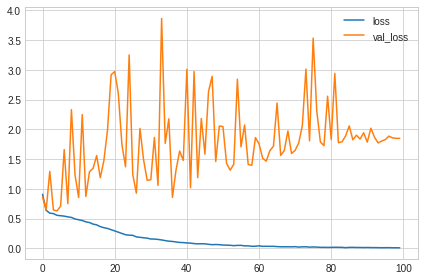

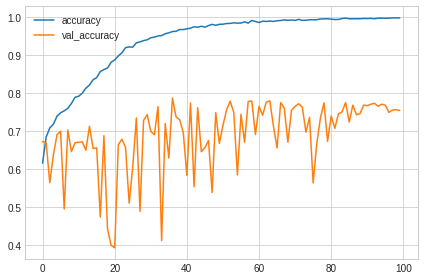

time: 737 ms (started: 2022-09-20 05:16:15 +00:00)


In [35]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

desde la 5ta epoch, ya se puede dejar de entrenar el modelo. porque el overfiting aparece y ya no hay mejora en la validacion. el algoritmo determino que desde los 10 epochs se debe parar con un patience de 30. El modelo es bueno y dará predicciones arriba del 80%

In [36]:

# Save the entire model as a SavedModel.
import os
path = "/gdrive/MyDrive/models/Alexnet_histo_gray"
os.mkdir(path)

model.save(path) 



time: 5.83 s (started: 2022-09-20 05:16:16 +00:00)


# **-----------------------------------------------**
# **You can load a previous trained model**

In [142]:
path = "/gdrive/MyDrive/models/Alexnet_histo_color"

time: 832 µs (started: 2022-09-20 07:57:45 +00:00)


In [143]:
#Reload model
new_model = tf.keras.models.load_model(path)

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 10, 10, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 10, 10, 96)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 10, 10, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_10 (Activation)  (None, 4, 4, 256)        

# **Confusion matrix**

In [145]:
import collections.abc
import functools
from typing import Any, Callable, Iterable, Iterator, Union

import numpy as np

import tensorflow as tf
from tensorflow_datasets.core import tf_compat
from tensorflow_datasets.core import utils
from tensorflow_datasets.core.utils import type_utils
import tensorflow_datasets as tfds

time: 1.8 ms (started: 2022-09-20 07:58:01 +00:00)


In [146]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

time: 4.27 ms (started: 2022-09-20 07:58:02 +00:00)


In [147]:
#val_ds= tfds.load(name="mnist", split="train")
ds_numpy = tfds.as_numpy(val_ds)

time: 603 µs (started: 2022-09-20 07:58:03 +00:00)


In [148]:
type(ds_numpy)

tensorflow_datasets.core.dataset_utils._IterableDataset

time: 2.61 ms (started: 2022-09-20 07:58:03 +00:00)


In [ ]:
predictions = new_model.predict(val_ds)

In [45]:
type(predictions)

numpy.ndarray

time: 7.49 ms (started: 2022-09-20 05:16:26 +00:00)


In [46]:
predictions.shape

(1619, 2)

time: 5.31 ms (started: 2022-09-20 05:16:26 +00:00)




---



---



In [47]:
true_categories = tf.concat([y for x, y in val_ds], axis=0)

time: 26.5 ms (started: 2022-09-20 05:16:26 +00:00)


In [48]:
y_pred = new_model.predict(val_ds)

time: 168 ms (started: 2022-09-20 05:16:26 +00:00)


In [49]:
val_pred = np.argmax(new_model.predict(val_ds), axis=-1)

time: 212 ms (started: 2022-09-20 05:16:27 +00:00)


https://stackoverflow.com/questions/66636157/how-can-i-plot-a-confusion-matrix-for-image-dataset-from-directory

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_categories, val_pred)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

# **Plotted Matrix**

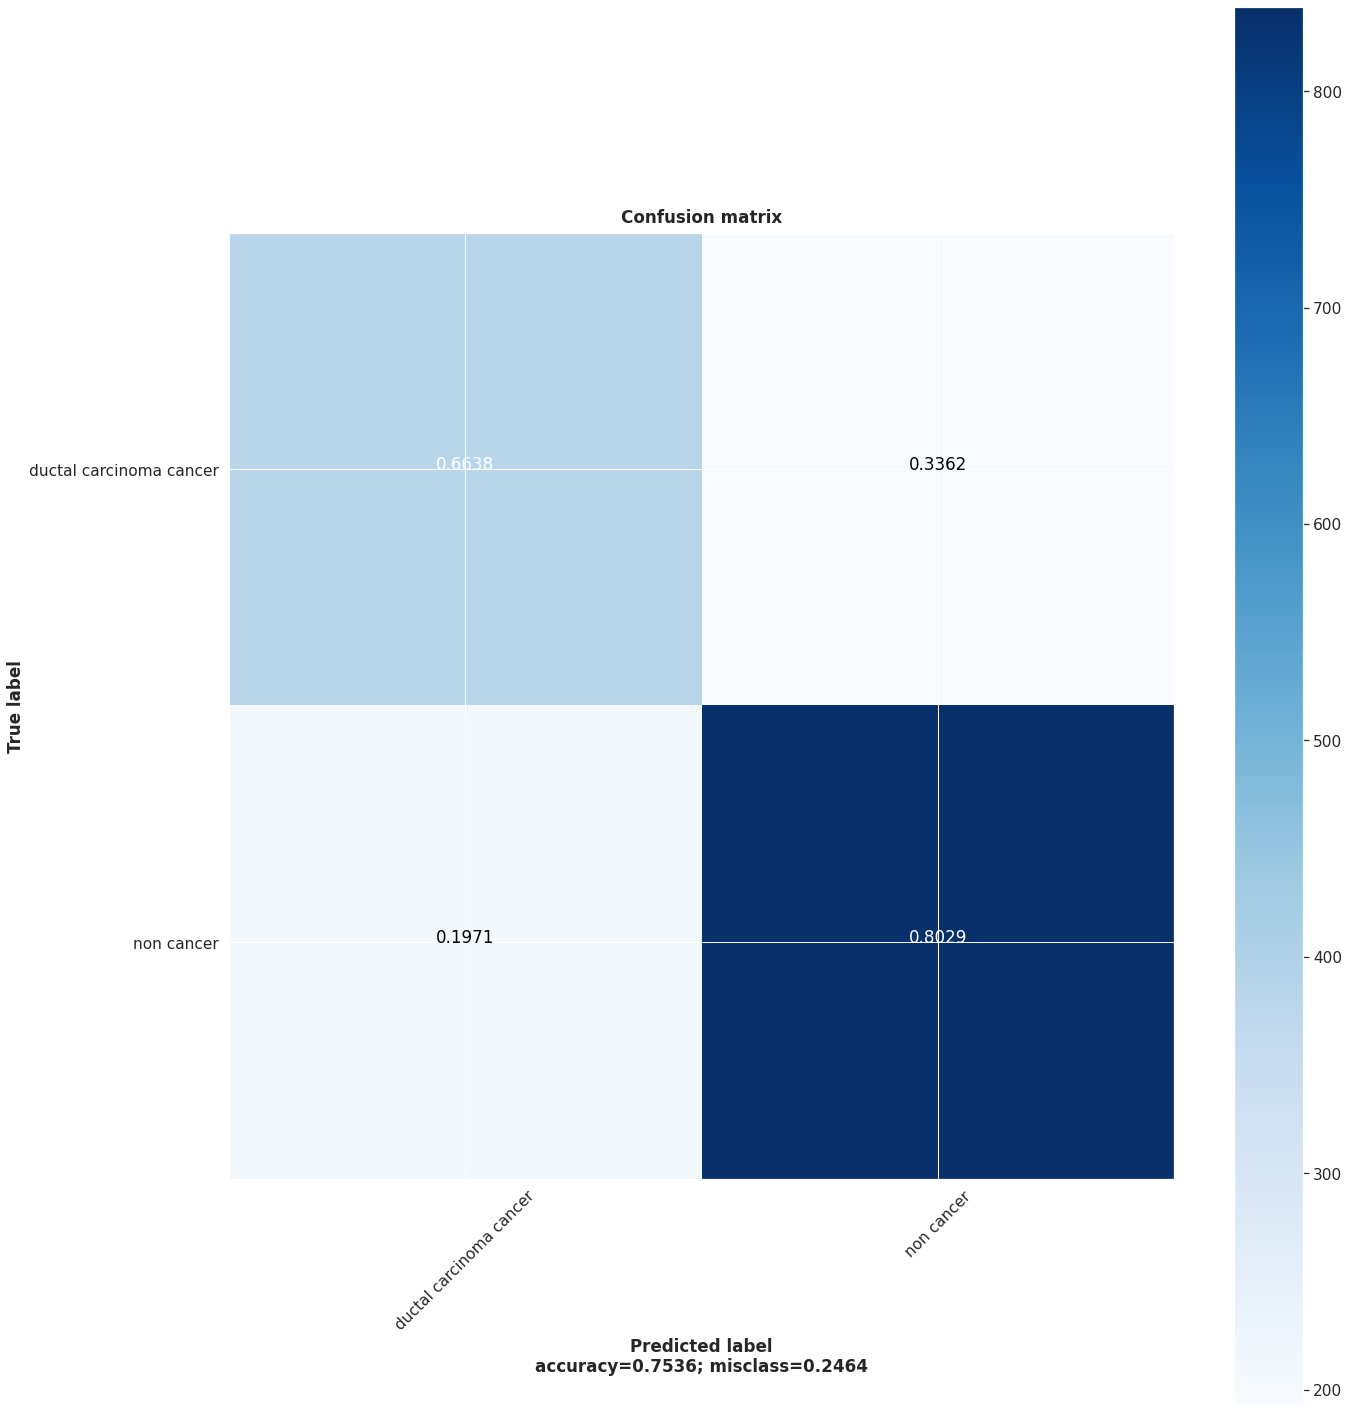

time: 620 ms (started: 2022-09-20 05:16:27 +00:00)


In [52]:
plot_confusion_matrix(cm,
                          class_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

***Alexnet es muy buena para predecir covid y viral Pneumonia***

In [53]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix

# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,381,193
Actual Positive,206,839


time: 27 ms (started: 2022-09-20 05:16:28 +00:00)


# **Confusion Metrics**

In [39]:
score = new_model.evaluate(val_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

51/51 [==============================] - 1s 6ms/step - loss: 1.8482 - accuracy: 0.7536
Test loss: 1.8481621742248535
Test accuracy: 0.7535516023635864
time: 592 ms (started: 2022-09-20 05:16:25 +00:00)


In [55]:
confusion_metrics (cm)

True Positives: 839
True Negatives: 381
False Positives: 193
False Negatives: 206
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.8
Specificity: 0.66
Precision: 0.66
f_1 Score: 0.73
time: 3.01 ms (started: 2022-09-20 05:16:28 +00:00)


# **Plot model**

In [67]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 13.9 MB/s 
time: 8.93 s (started: 2022-09-20 06:49:52 +00:00)


In [165]:
new_model = tf.keras.models.load_model("/gdrive/MyDrive/models/Resnet50_histo_color")

time: 17.6 s (started: 2022-09-20 08:15:56 +00:00)


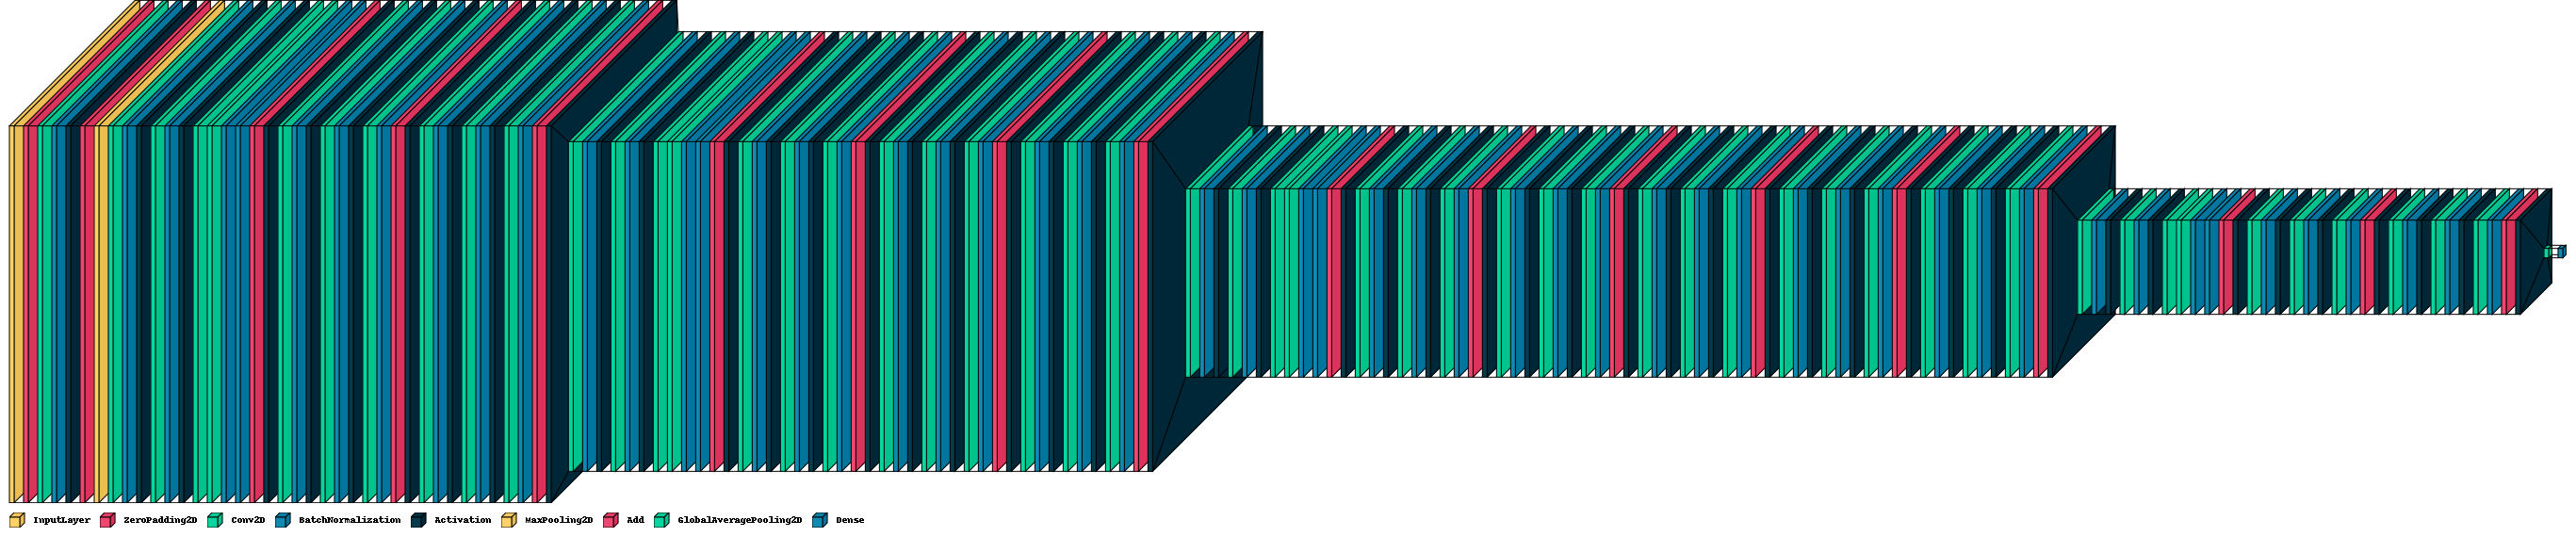

time: 275 ms (started: 2022-09-20 08:17:49 +00:00)


In [172]:
from PIL import ImageFont

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(new_model, legend=True,
                         min_xy=10,max_xy=400, min_z=10 , max_z=5 , spacing=10
                         ,scale_xy=50, scale_z=10,
                         to_file='/content/Resnet layers.png') 

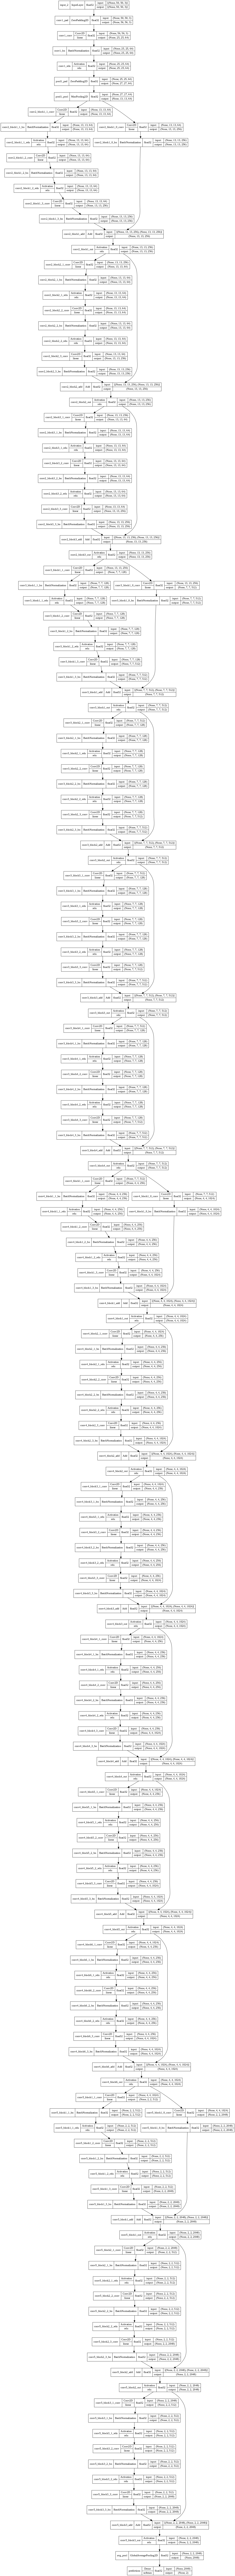

time: 2.06 s (started: 2022-09-20 08:18:05 +00:00)


In [173]:
tf.keras.utils.plot_model(
    new_model,
    to_file="/content/Resnet detailed.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TR",
    expand_nested=True,
    dpi=90,
    layer_range=None,
    show_layer_activations=True,
)